# Import library and Load data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
#Load data
url = 'https://raw.githubusercontent.com/Sidqixx/DataMining/main/economic_impact_on_emissions_modified.csv'
economic_impact_df = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/Sidqixx/DataMining/main/Carbon_(CO2)_Emissions_by_Country.csv'
co2_emissions_df= pd.read_csv(url2)




In [ ]:
print(economic_impact_df.columns)

Index(['Country', 'GDP_per_Capita', 'Fuel_Price', 'Population_Density',
       'Urbanization_Rate', 'CO2_Emissions', 'Emission_Category'],
      dtype='object')


# Prepare Data

In [ ]:
# Function to classify emissions
def classify_emissions(emission):
    if emission < 150:
        return 'Low'
    elif 150 <= emission < 300:
        return 'Medium'
    else:
        return 'High'

# Check the column names
print(economic_impact_df.columns)

# If 'Emission_Category' does not exist, create it
if 'Emission_Category' not in economic_impact_df.columns:
    # Ensure 'CO2_Emissions' is the correct column name
    economic_impact_df['Emission_Category'] = economic_impact_df['CO2_Emissions'].apply(classify_emissions)

# Merge the datasets on a common key (assuming 'Country' is the common key)
merged_df = pd.merge(economic_impact_df, co2_emissions_df, on='Country', how='inner')

# Prepare data for modeling
X = merged_df.drop(columns=['Emission_Category'])  # Features
y = merged_df['Emission_Category']  # Target variable



Index(['Country', 'GDP_per_Capita', 'Fuel_Price', 'Population_Density',
       'Urbanization_Rate', 'CO2_Emissions', 'Emission_Category'],
      dtype='object')


# Data Pre Processing

In [ ]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

#2. (Check for Duplicates)
duplicates = merged_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If duplicates exist, remove them
if duplicates > 0:
    merged_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

# 3.(Check for Missing Values)
missing_values = merged_df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])  # Display only columns with missing values

# Handle missing values
# Separate numeric and categorical columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns
categorical_cols = merged_df.select_dtypes(include=['object']).columns

# Fill missing values with the mean for numerical columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Fill missing values with the mode for categorical columns
for column in categorical_cols:
    merged_df[column].fillna(merged_df[column].mode()[0], inplace=True)

# 4.(Check Data Types)
data_types = merged_df.dtypes
print("\nData types of each column:")
print(data_types)





Number of duplicate rows: 0

Missing values in each column:
GDP_per_Capita        1350
Fuel_Price            1350
Population_Density    1320
Urbanization_Rate     1410
CO2_Emissions         1380
Emission_Category     1440
dtype: int64

Data types of each column:
Country                    object
GDP_per_Capita            float64
Fuel_Price                float64
Population_Density        float64
Urbanization_Rate         float64
CO2_Emissions             float64
Emission_Category          object
Region                     object
Date                       object
Kilotons of Co2           float64
Metric Tons Per Capita    float64
dtype: object


<ipython-input-7-62f0ae1c470a>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(merged_df[column].mode()[0], inplace=True)


# Decision Tree


Decision Tree Model Evaluation:
[[2106   48  275]
 [   0 1052  139]
 [   0    0 1822]]
              precision    recall  f1-score   support

        High       1.00      0.87      0.93      2429
         Low       0.96      0.88      0.92      1191
      Medium       0.81      1.00      0.90      1822

    accuracy                           0.92      5442
   macro avg       0.92      0.92      0.92      5442
weighted avg       0.93      0.92      0.92      5442

Decision Tree Accuracy: 0.92


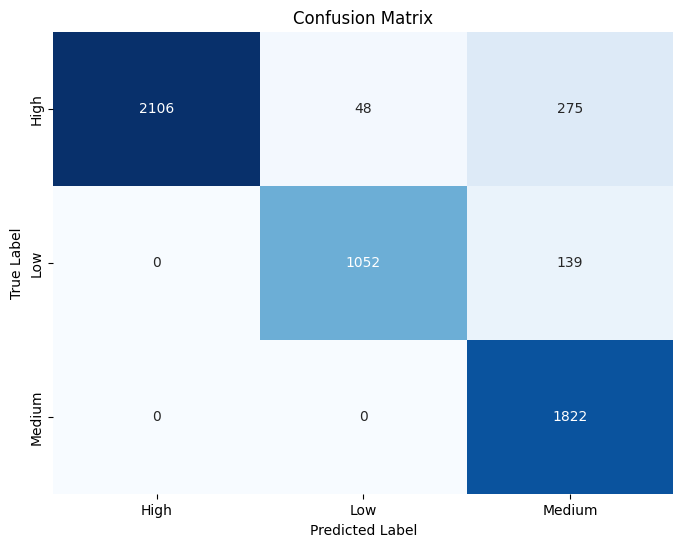

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=2, min_samples_split=20, random_state=42)  # Stricter limits
dt_model.fit(X_train, y_train)

# Make predictions with the Decision Tree model
dt_predictions = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Model Evaluation:")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, dt_predictions)

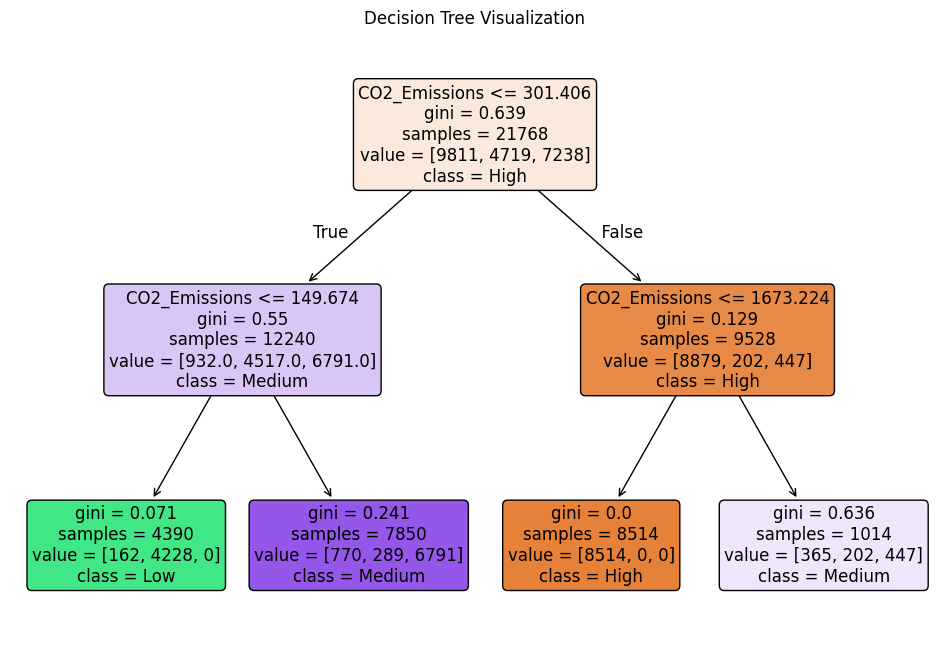

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=np.unique(y).astype(str),
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()

# Random Forest


Random Forest Model Evaluation:
[[2211   38  180]
 [  68 1050   73]
 [  95    0 1727]]
              precision    recall  f1-score   support

        High       0.93      0.91      0.92      2429
         Low       0.97      0.88      0.92      1191
      Medium       0.87      0.95      0.91      1822

    accuracy                           0.92      5442
   macro avg       0.92      0.91      0.92      5442
weighted avg       0.92      0.92      0.92      5442

Random Forest Accuracy: 0.92


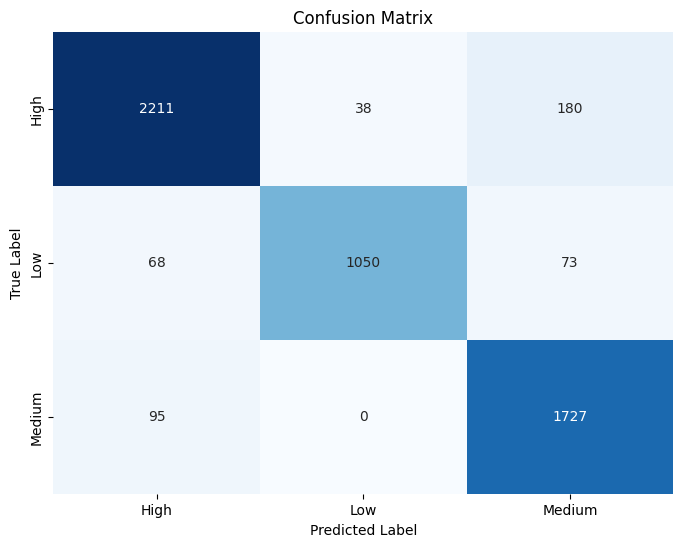

In [ ]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10,random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

plot_confusion_matrix(y_test, rf_predictions)

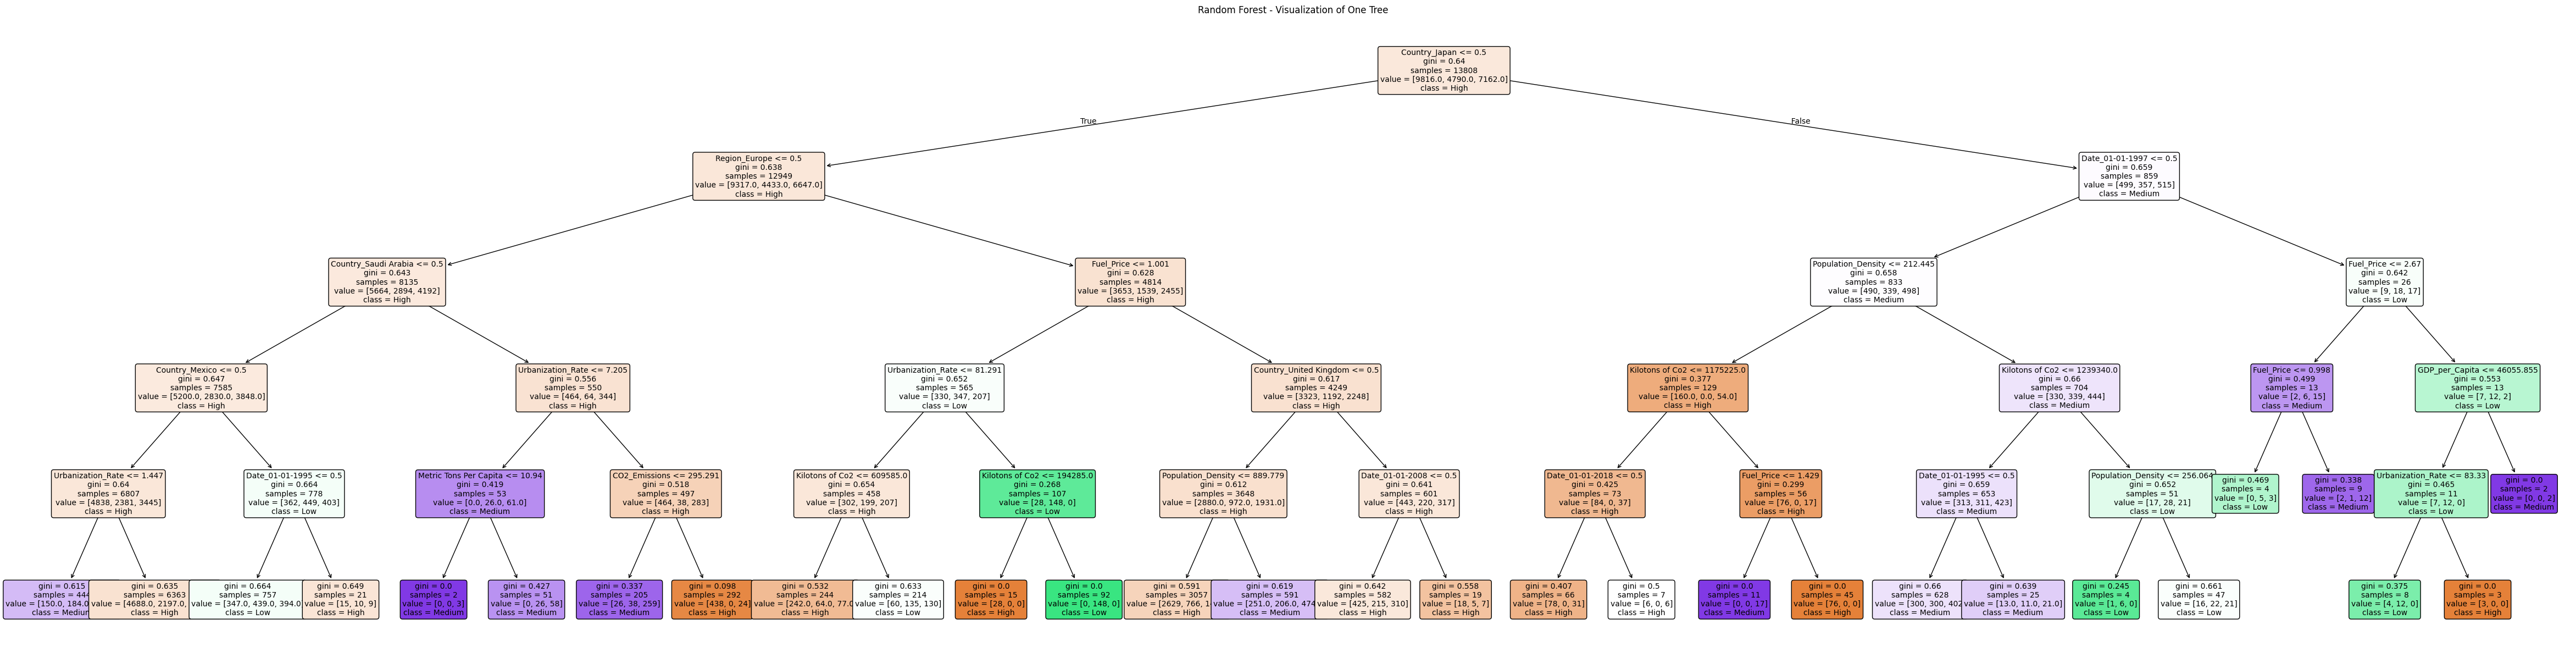

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Visualize one of the trees in the Random Forest
plt.figure(figsize=(60, 15))
# Visualize the first tree in the Random Forest
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=np.unique(y).astype(str),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Random Forest - Visualization of One Tree')
plt.show()

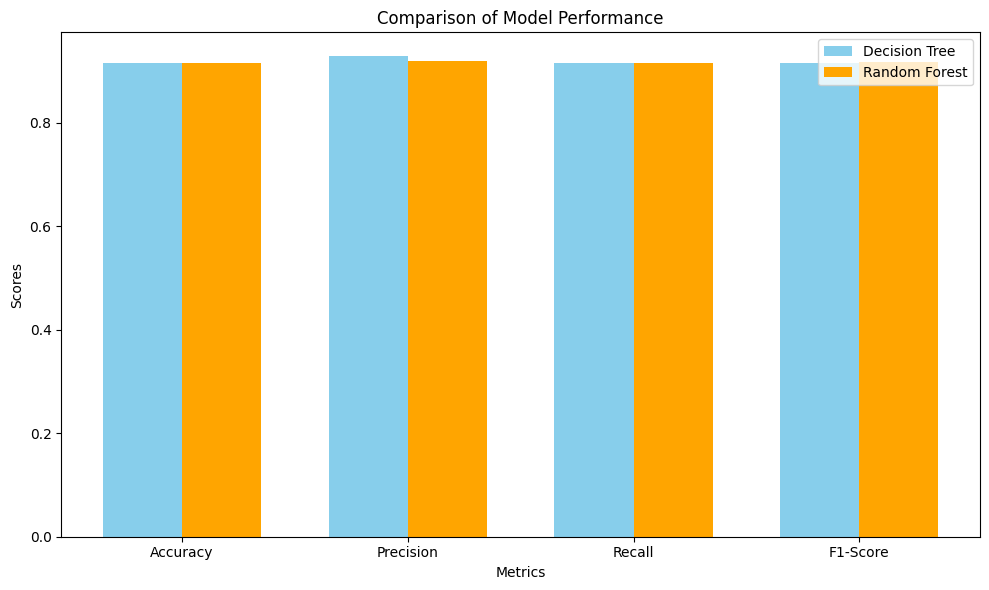

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Simpan metrik untuk kedua model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
dt_metrics = [
    dt_accuracy,
    precision_score(y_test, dt_predictions, average='weighted'),
    recall_score(y_test, dt_predictions, average='weighted'),
    f1_score(y_test, dt_predictions, average='weighted'),
]
rf_metrics = [
    rf_accuracy,
    precision_score(y_test, rf_predictions, average='weighted'),
    recall_score(y_test, rf_predictions, average='weighted'),
    f1_score(y_test, rf_predictions, average='weighted'),
]

# Plot perbandingan metrik
x = np.arange(len(metrics))  # Label posisi
width = 0.35  # Lebar bar

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, dt_metrics, width, label='Decision Tree', color='skyblue')
bar2 = ax.bar(x + width/2, rf_metrics, width, label='Random Forest', color='orange')

# Labeling
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()